# **Handwritten Digit Recognition Project**

**Goal**
This project focuses on creating a robust handwritten digit recognition system using the MNIST dataset. The primary objective is to optimize the model's performance through hyperparameter tuning, enhancing its accuracy in recognizing digits (0-9).

**Approach**

1. Data Preprocessing:



* Load and preprocess the MNIST dataset.
* Normalize pixel values to [0, 1].

2. Model Design:

* Create a neural network architecture suitable for digit recognition.

3. Hyperparameter Tuning:

* Utilize randomized search to optimize learning rates, dropout, and layer sizes.

4. Training and Evaluation:

* Train the model on the dataset.
* Evaluate performance metrics like accuracy.

5. Outcome

* Aim to achieve an optimized model for accurate handwritten digit recognition.

# **installing necessary packages**

In [ ]:
pip install scikeras

# **Importing libraries**

In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

# **Loading Dataset**

In [126]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Label: 0


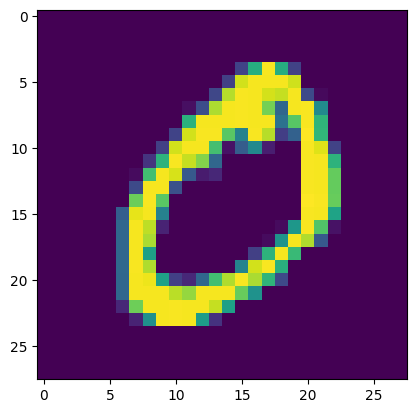

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)


In [82]:
print("Label:", train_labels[1])
plt.imshow(train_images[1])
plt.show()
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)

# **Normalisation and reshaping of images**

In [129]:
train_images = train_images.astype(np.float32) / 255
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

In [133]:
test_images = test_images.astype(np.float32) / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

#**model Creation function**

In [84]:
def create_model(learning_rate=0.01,node1=256,node2=128,node3=64,dropout_rate=0.2):
  model = models.Sequential([
      layers.Flatten(input_shape=(28, 28)),
      layers.Dense(node1, activation='relu'),
      layers.Dropout(dropout_rate),
      layers.Dense(node2, activation='relu'),
      layers.Dropout(dropout_rate),
      layers.Dense(node3, activation='relu'),
      layers.Dropout(dropout_rate),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [91]:
model = KerasClassifier(build_fn=create_model,dropout_rate=0.4,learning_rate=0.1,node1=256,node2=128,node3=64,epochs=5, batch_size=128)
# model = create_model()

# **Data Augmentation**

In [92]:
data_generator = ImageDataGenerator(rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.1)
data_generator.fit(train_images)

# **HyperParameter Tuning**

In [93]:
params_tuning = {
    'learning_rate' : np.logspace(-4,0, num=20),
    'node1' : randint(64, 256),
    'node2' : randint(32, 128),
    'node3' : randint(32,128),
    'dropout_rate' : [0.2,0.4,0.6],
    'epochs' : [10, 15, 20],
    'batch_size' : [32, 64, 128, 256, 512]
}

In [94]:
random_search = RandomizedSearchCV(estimator = model, param_distributions=params_tuning,n_iter=10,cv=4)
random_result = random_search.fit(train_images,train_labels)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
88/88 [==============================] - 2s 4ms/step - loss: 2.2862 - accuracy: 0.1655
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 2.1113 - accuracy: 0.1991
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0891 - accuracy: 0.2004
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0915 - accuracy: 0.1955
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 2.1507 - accuracy: 0.1831
Epoch 6/10
88/88 [==============================] - 0s 4ms/step - loss: 2.1981 - accuracy: 0.1630
Epoch 7/10
88/88 [==============================] - 0s 4ms/step - loss: 2.2564 - accuracy: 0.1225
Epoch 8/10
88/88 [==============================] - 0s 4ms/step - loss: 2.2453 - accuracy: 0.1265
Epoch 9/10
88/88 [==============================] - 0s 4ms/step - loss: 2.2542 - accuracy: 0.1217
Epoch 10/10
30/30 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
88/88 [==============================] - 2s 4ms/step - loss: 2.0944 - accuracy: 0.2549
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9185 - accuracy: 0.3022
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9478 - accuracy: 0.2923
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9418 - accuracy: 0.2811
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9720 - accuracy: 0.2728
Epoch 6/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0290 - accuracy: 0.2381
Epoch 7/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0050 - accuracy: 0.2461
Epoch 8/10
88/88 [==============================] - 0s 6ms/step - loss: 2.0314 - accuracy: 0.2321
Epoch 9/10
88/88 [==============================] - 1s 6ms/step - loss: 2.0940 - accuracy: 0.2178
Epoch 10/10
30/30 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
88/88 [==============================] - 2s 4ms/step - loss: 2.1308 - accuracy: 0.2233
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0264 - accuracy: 0.2369
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0662 - accuracy: 0.2192
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0827 - accuracy: 0.2077
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0796 - accuracy: 0.2073
Epoch 6/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0859 - accuracy: 0.2069
Epoch 7/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0906 - accuracy: 0.1982
Epoch 8/10
88/88 [==============================] - 0s 4ms/step - loss: 2.1163 - accuracy: 0.1973
Epoch 9/10
88/88 [==============================] - 0s 4ms/step - loss: 2.1406 - accuracy: 0.1818
Epoch 10/10
30/30 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
88/88 [==============================] - 2s 4ms/step - loss: 2.1119 - accuracy: 0.2448
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9417 - accuracy: 0.2768
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 1.9592 - accuracy: 0.2676
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0002 - accuracy: 0.2553
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 2.0588 - accuracy: 0.2180
Epoch 6/10
88/88 [==============================] - 0s 6ms/step - loss: 2.0755 - accuracy: 0.2195
Epoch 7/10
88/88 [==============================] - 0s 6ms/step - loss: 2.1102 - accuracy: 0.1884
Epoch 8/10
88/88 [==============================] - 1s 6ms/step - loss: 2.1197 - accuracy: 0.1856
Epoch 9/10
88/88 [==============================] - 1s 6ms/step - loss: 2.0955 - accuracy: 0.1960
Epoch 10/10
30/30 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 3s 4ms/step - loss: 0.6573 - accuracy: 0.7931
Epoch 2/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3065 - accuracy: 0.9142
Epoch 3/15
352/352 [==============================] - 1s 4ms/step - loss: 0.2464 - accuracy: 0.9310
Epoch 4/15
352/352 [==============================] - 1s 4ms/step - loss: 0.2155 - accuracy: 0.9399
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1944 - accuracy: 0.9453
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1825 - accuracy: 0.9478
Epoch 7/15
352/352 [==============================] - 2s 5ms/step - loss: 0.1685 - accuracy: 0.9528
Epoch 8/15
352/352 [==============================] - 2s 5ms/step - loss: 0.1607 - accuracy: 0.9542
Epoch 9/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1535 - accuracy: 0.9567
Epoch 10/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1461 - accuracy: 0.9590

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 4s 4ms/step - loss: 0.6663 - accuracy: 0.7906
Epoch 2/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3138 - accuracy: 0.9144
Epoch 3/15
352/352 [==============================] - 1s 3ms/step - loss: 0.2514 - accuracy: 0.9312
Epoch 4/15
352/352 [==============================] - 1s 4ms/step - loss: 0.2194 - accuracy: 0.9391
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.2031 - accuracy: 0.9433
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1817 - accuracy: 0.9502
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1782 - accuracy: 0.9498
Epoch 8/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1644 - accuracy: 0.9540
Epoch 9/15
352/352 [==============================] - 2s 5ms/step - loss: 0.1570 - accuracy: 0.9558
Epoch 10/15
352/352 [==============================] - 2s 5ms/step - loss: 0.1469 - accuracy: 0.9589

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 3s 4ms/step - loss: 0.6579 - accuracy: 0.7915
Epoch 2/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3092 - accuracy: 0.9144
Epoch 3/15
352/352 [==============================] - 2s 5ms/step - loss: 0.2554 - accuracy: 0.9288
Epoch 4/15
352/352 [==============================] - 2s 5ms/step - loss: 0.2227 - accuracy: 0.9379
Epoch 5/15
352/352 [==============================] - 2s 6ms/step - loss: 0.1976 - accuracy: 0.9438
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1837 - accuracy: 0.9486
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1761 - accuracy: 0.9517
Epoch 8/15
352/352 [==============================] - 1s 3ms/step - loss: 0.1601 - accuracy: 0.9542
Epoch 9/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1558 - accuracy: 0.9550
Epoch 10/15
352/352 [==============================] - 2s 4ms/step - loss: 0.1463 - accuracy: 0.9589

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 2s 4ms/step - loss: 0.6682 - accuracy: 0.7911
Epoch 2/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3101 - accuracy: 0.9121
Epoch 3/15
352/352 [==============================] - 2s 5ms/step - loss: 0.2538 - accuracy: 0.9290
Epoch 4/15
352/352 [==============================] - 2s 5ms/step - loss: 0.2173 - accuracy: 0.9401
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.2006 - accuracy: 0.9437
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1839 - accuracy: 0.9493
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1743 - accuracy: 0.9516
Epoch 8/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1649 - accuracy: 0.9545
Epoch 9/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1532 - accuracy: 0.9566
Epoch 10/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.9581

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
88/88 [==============================] - 2s 4ms/step - loss: 79.1277 - accuracy: 0.1017
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 11.2163 - accuracy: 0.1056
Epoch 3/15
88/88 [==============================] - 0s 4ms/step - loss: 37.3828 - accuracy: 0.1048
Epoch 4/15
88/88 [==============================] - 0s 4ms/step - loss: 4.0638 - accuracy: 0.1013
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 14.6462 - accuracy: 0.1021
Epoch 6/15
88/88 [==============================] - 0s 4ms/step - loss: 2.3207 - accuracy: 0.1034
Epoch 7/15
88/88 [==============================] - 0s 4ms/step - loss: 5.0933 - accuracy: 0.1047
Epoch 8/15
88/88 [==============================] - 0s 4ms/step - loss: 2.3088 - accuracy: 0.1048
Epoch 9/15
88/88 [==============================] - 0s 4ms/step - loss: 5.4457 - accuracy: 0.1064
Epoch 10/15
88/88 [==============================] - 0s 4ms/step - loss: 3.5298 - accuracy: 0.1049
Epoch 11/15
88/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
88/88 [==============================] - 2s 4ms/step - loss: 58.5831 - accuracy: 0.1039
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 23.7710 - accuracy: 0.1033
Epoch 3/15
88/88 [==============================] - 0s 4ms/step - loss: 44.6181 - accuracy: 0.1034
Epoch 4/15
88/88 [==============================] - 0s 4ms/step - loss: 8.7067 - accuracy: 0.1038
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 24.5017 - accuracy: 0.1026
Epoch 6/15
88/88 [==============================] - 0s 4ms/step - loss: 45.1309 - accuracy: 0.1025
Epoch 7/15
88/88 [==============================] - 0s 4ms/step - loss: 4.0894 - accuracy: 0.1054
Epoch 8/15
88/88 [==============================] - 0s 4ms/step - loss: 2.3085 - accuracy: 0.1022
Epoch 9/15
88/88 [==============================] - 0s 4ms/step - loss: 4.4244 - accuracy: 0.1001
Epoch 10/15
88/88 [==============================] - 0s 4ms/step - loss: 2.3105 - accuracy: 0.1028
Epoch 11/15
88

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
88/88 [==============================] - 2s 5ms/step - loss: 142.5249 - accuracy: 0.1044
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 79.6991 - accuracy: 0.1037
Epoch 3/15
88/88 [==============================] - 0s 4ms/step - loss: 4.9262 - accuracy: 0.1013
Epoch 4/15
88/88 [==============================] - 0s 4ms/step - loss: 27.7090 - accuracy: 0.1052
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 29.7300 - accuracy: 0.1053
Epoch 6/15
88/88 [==============================] - 0s 4ms/step - loss: 10.6659 - accuracy: 0.1052
Epoch 7/15
88/88 [==============================] - 0s 4ms/step - loss: 2.3096 - accuracy: 0.1042
Epoch 8/15
88/88 [==============================] - 0s 4ms/step - loss: 14.3978 - accuracy: 0.1050
Epoch 9/15
88/88 [==============================] - 0s 4ms/step - loss: 3.6349 - accuracy: 0.1050
Epoch 10/15
88/88 [==============================] - 0s 4ms/step - loss: 3.0407 - accuracy: 0.1026
Epoch 11/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
88/88 [==============================] - 2s 6ms/step - loss: 59.9093 - accuracy: 0.1043
Epoch 2/15
88/88 [==============================] - 1s 6ms/step - loss: 12.0245 - accuracy: 0.1056
Epoch 3/15
88/88 [==============================] - 0s 5ms/step - loss: 20.0120 - accuracy: 0.1047
Epoch 4/15
88/88 [==============================] - 0s 4ms/step - loss: 12.5715 - accuracy: 0.1034
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 15.3799 - accuracy: 0.1038
Epoch 6/15
88/88 [==============================] - 0s 4ms/step - loss: 16.7824 - accuracy: 0.1032
Epoch 7/15
88/88 [==============================] - 0s 4ms/step - loss: 9.5437 - accuracy: 0.1014
Epoch 8/15
88/88 [==============================] - 0s 4ms/step - loss: 2.5764 - accuracy: 0.1035
Epoch 9/15
88/88 [==============================] - 0s 4ms/step - loss: 2.3109 - accuracy: 0.1058
Epoch 10/15
88/88 [==============================] - 0s 4ms/step - loss: 3.0247 - accuracy: 0.1073
Epoch 11/15
8

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 5s 4ms/step - loss: 1.0109 - accuracy: 0.6668
Epoch 2/15
352/352 [==============================] - 1s 4ms/step - loss: 0.5401 - accuracy: 0.8563
Epoch 3/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4526 - accuracy: 0.8830
Epoch 4/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8945
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3884 - accuracy: 0.8996
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.9063
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3522 - accuracy: 0.9126
Epoch 8/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.9135
Epoch 9/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3337 - accuracy: 0.9157
Epoch 10/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3173 - accuracy: 0.9190

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 3s 5ms/step - loss: 1.0096 - accuracy: 0.6713
Epoch 2/15
352/352 [==============================] - 2s 5ms/step - loss: 0.5603 - accuracy: 0.8498
Epoch 3/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4708 - accuracy: 0.8758
Epoch 4/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.8884
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4023 - accuracy: 0.8964
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3822 - accuracy: 0.9023
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3572 - accuracy: 0.9080
Epoch 8/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3554 - accuracy: 0.9099
Epoch 9/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3463 - accuracy: 0.9110
Epoch 10/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3379 - accuracy: 0.9133

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 3s 4ms/step - loss: 1.0191 - accuracy: 0.6613
Epoch 2/15
352/352 [==============================] - 2s 4ms/step - loss: 0.5317 - accuracy: 0.8583
Epoch 3/15
352/352 [==============================] - 2s 6ms/step - loss: 0.4456 - accuracy: 0.8851
Epoch 4/15
352/352 [==============================] - 2s 4ms/step - loss: 0.4172 - accuracy: 0.8939
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3902 - accuracy: 0.9004
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3771 - accuracy: 0.9039
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3581 - accuracy: 0.9068
Epoch 8/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.9098
Epoch 9/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3347 - accuracy: 0.9136
Epoch 10/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3351 - accuracy: 0.9137

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
352/352 [==============================] - 3s 4ms/step - loss: 1.1092 - accuracy: 0.6385
Epoch 2/15
352/352 [==============================] - 1s 4ms/step - loss: 0.5908 - accuracy: 0.8392
Epoch 3/15
352/352 [==============================] - 1s 4ms/step - loss: 0.5171 - accuracy: 0.8644
Epoch 4/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4766 - accuracy: 0.8768
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.8883
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8917
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3990 - accuracy: 0.8972
Epoch 8/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3925 - accuracy: 0.8985
Epoch 9/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3753 - accuracy: 0.9041
Epoch 10/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3647 - accuracy: 0.9057

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 0.7771 - accuracy: 0.7506
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3271 - accuracy: 0.9090
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2533 - accuracy: 0.9313
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2132 - accuracy: 0.9426
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1880 - accuracy: 0.9496
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1655 - accuracy: 0.9551
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1561 - accuracy: 0.9572
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1412 - accuracy: 0.9628
Epoch 9/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1290 - accuracy: 0.9647
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7810 - accuracy: 0.7527
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3309 - accuracy: 0.9099
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2525 - accuracy: 0.9327
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2099 - accuracy: 0.9433
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1867 - accuracy: 0.9505
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1706 - accuracy: 0.9543
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1518 - accuracy: 0.9593
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1431 - accuracy: 0.9605
Epoch 9/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1304 - accuracy: 0.9657
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7789 - accuracy: 0.7541
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3372 - accuracy: 0.9077
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2505 - accuracy: 0.9326
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2158 - accuracy: 0.9429
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1839 - accuracy: 0.9514
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1676 - accuracy: 0.9548
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1472 - accuracy: 0.9606
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1357 - accuracy: 0.9629
Epoch 9/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1239 - accuracy: 0.9648
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 0.7761 - accuracy: 0.7550
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3390 - accuracy: 0.9079
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2560 - accuracy: 0.9312
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2091 - accuracy: 0.9444
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1869 - accuracy: 0.9499
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1691 - accuracy: 0.9551
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1497 - accuracy: 0.9593
Epoch 8/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1390 - accuracy: 0.9626
Epoch 9/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1339 - accuracy: 0.9644
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 0.8487 - accuracy: 0.7542
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.6560 - accuracy: 0.8282
Epoch 3/20
704/704 [==============================] - 3s 5ms/step - loss: 0.6109 - accuracy: 0.8417
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5854 - accuracy: 0.8497
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5971 - accuracy: 0.8489
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5870 - accuracy: 0.8500
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5939 - accuracy: 0.8476
Epoch 8/20
704/704 [==============================] - 3s 5ms/step - loss: 0.5793 - accuracy: 0.8524
Epoch 9/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5923 - accuracy: 0.8494
Epoch 10/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5944 - accuracy: 0.8494

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 0.8314 - accuracy: 0.7560
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.6398 - accuracy: 0.8322
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 0.5963 - accuracy: 0.8429
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.6115 - accuracy: 0.8434
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 0.5795 - accuracy: 0.8501
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5981 - accuracy: 0.8475
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5947 - accuracy: 0.8477
Epoch 8/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5688 - accuracy: 0.8535
Epoch 9/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5915 - accuracy: 0.8488
Epoch 10/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5552 - accuracy: 0.8592

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 3ms/step - loss: 0.8343 - accuracy: 0.7521
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.6628 - accuracy: 0.8225
Epoch 3/20
704/704 [==============================] - 3s 5ms/step - loss: 0.6425 - accuracy: 0.8324
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.6109 - accuracy: 0.8412
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.6002 - accuracy: 0.8456
Epoch 6/20
704/704 [==============================] - 2s 3ms/step - loss: 0.5807 - accuracy: 0.8505
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5853 - accuracy: 0.8470
Epoch 8/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5673 - accuracy: 0.8561
Epoch 9/20
704/704 [==============================] - 2s 4ms/step - loss: 0.5972 - accuracy: 0.8470
Epoch 10/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5882 - accuracy: 0.8519

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 0.8335 - accuracy: 0.7524
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.6605 - accuracy: 0.8268
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 0.6287 - accuracy: 0.8356
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.6579 - accuracy: 0.8351
Epoch 5/20
704/704 [==============================] - 2s 4ms/step - loss: 0.6416 - accuracy: 0.8381
Epoch 6/20
704/704 [==============================] - 3s 5ms/step - loss: 0.6096 - accuracy: 0.8473
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5771 - accuracy: 0.8576
Epoch 8/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5986 - accuracy: 0.8517
Epoch 9/20
704/704 [==============================] - 3s 4ms/step - loss: 0.6056 - accuracy: 0.8502
Epoch 10/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5871 - accuracy: 0.8504

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 0.4751 - accuracy: 0.8539
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1937 - accuracy: 0.9438
Epoch 3/20
704/704 [==============================] - 3s 5ms/step - loss: 0.1453 - accuracy: 0.9576
Epoch 4/20
704/704 [==============================] - 2s 4ms/step - loss: 0.1156 - accuracy: 0.9670
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0951 - accuracy: 0.9718
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0796 - accuracy: 0.9764
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0740 - accuracy: 0.9783
Epoch 8/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 9/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0571 - accuracy: 0.9822
Epoch 10/20
704/704 [==============================] - 2s 4ms/step - loss: 0.0547 - accuracy: 0.9837

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 0.4759 - accuracy: 0.8530
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.1943 - accuracy: 0.9432
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1438 - accuracy: 0.9576
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1154 - accuracy: 0.9660
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0958 - accuracy: 0.9714
Epoch 6/20
704/704 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9742
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0742 - accuracy: 0.9771
Epoch 8/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0647 - accuracy: 0.9796
Epoch 9/20
704/704 [==============================] - 4s 6ms/step - loss: 0.0593 - accuracy: 0.9815
Epoch 10/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0564 - accuracy: 0.9830

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 0.4668 - accuracy: 0.8569
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1897 - accuracy: 0.9437
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1392 - accuracy: 0.9590
Epoch 4/20
704/704 [==============================] - 2s 4ms/step - loss: 0.1114 - accuracy: 0.9670
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0950 - accuracy: 0.9711
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0796 - accuracy: 0.9746
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0749 - accuracy: 0.9764
Epoch 8/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0667 - accuracy: 0.9794
Epoch 9/20
704/704 [==============================] - 2s 4ms/step - loss: 0.0582 - accuracy: 0.9822
Epoch 10/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0541 - accuracy: 0.9833

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 0.4671 - accuracy: 0.8544
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1899 - accuracy: 0.9435
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1383 - accuracy: 0.9598
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 0.1120 - accuracy: 0.9674
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0926 - accuracy: 0.9728
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0805 - accuracy: 0.9760
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0682 - accuracy: 0.9791
Epoch 8/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0646 - accuracy: 0.9800
Epoch 9/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0574 - accuracy: 0.9827
Epoch 10/20
704/704 [==============================] - 3s 4ms/step - loss: 0.0549 - accuracy: 0.9830

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
1407/1407 [==============================] - 8s 4ms/step - loss: 2.3476 - accuracy: 0.1080
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3092 - accuracy: 0.1033
Epoch 3/15
1407/1407 [==============================] - 6s 5ms/step - loss: 2.3096 - accuracy: 0.1045
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3095 - accuracy: 0.1021
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3410 - accuracy: 0.1041
Epoch 6/15
1407/1407 [==============================] - 5s 3ms/step - loss: 2.3083 - accuracy: 0.1024
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3075 - accuracy: 0.1051
Epoch 8/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3098 - accuracy: 0.1031
Epoch 9/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3082 - accuracy: 0.1043
Epoch 10/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.308

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3014 - accuracy: 0.1209
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3116 - accuracy: 0.1038
Epoch 3/15
1407/1407 [==============================] - 5s 3ms/step - loss: 2.3078 - accuracy: 0.1053
Epoch 4/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3093 - accuracy: 0.1060
Epoch 5/15
1407/1407 [==============================] - 5s 3ms/step - loss: 2.3084 - accuracy: 0.1045
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3080 - accuracy: 0.1016
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3080 - accuracy: 0.1056
Epoch 8/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3083 - accuracy: 0.1051
Epoch 9/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3077 - accuracy: 0.1059
Epoch 10/15
1407/1407 [==============================] - 5s 3ms/step - loss: 2.308

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
1407/1407 [==============================] - 7s 4ms/step - loss: 2.3368 - accuracy: 0.1049
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3085 - accuracy: 0.1044
Epoch 3/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3087 - accuracy: 0.1033
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3085 - accuracy: 0.1039
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3078 - accuracy: 0.1053
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3079 - accuracy: 0.1056
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3083 - accuracy: 0.1048
Epoch 8/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3078 - accuracy: 0.1036
Epoch 9/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3084 - accuracy: 0.1050
Epoch 10/15
1407/1407 [==============================] - 7s 5ms/step - loss: 2.308

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3455 - accuracy: 0.1030
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3086 - accuracy: 0.1021
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3079 - accuracy: 0.1046
Epoch 4/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3082 - accuracy: 0.1031
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3749 - accuracy: 0.1054
Epoch 6/15
1407/1407 [==============================] - 5s 3ms/step - loss: 2.3106 - accuracy: 0.1046
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3077 - accuracy: 0.1053
Epoch 8/15
1407/1407 [==============================] - 5s 3ms/step - loss: 2.3293 - accuracy: 0.1044
Epoch 9/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3078 - accuracy: 0.1027
Epoch 10/15
1407/1407 [==============================] - 5s 4ms/step - loss: 2.308

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
352/352 [==============================] - 3s 4ms/step - loss: 937.3641 - accuracy: 0.1007
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 6.7227 - accuracy: 0.1026
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 9.1843 - accuracy: 0.1035
Epoch 4/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3953 - accuracy: 0.1022
Epoch 5/10
352/352 [==============================] - 1s 4ms/step - loss: 2.8840 - accuracy: 0.1005
Epoch 6/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3499 - accuracy: 0.1019
Epoch 7/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3527 - accuracy: 0.1000
Epoch 8/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3577 - accuracy: 0.1032
Epoch 9/10
352/352 [==============================] - 1s 4ms/step - loss: 3.7330 - accuracy: 0.1029
Epoch 10/10
118/118 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
352/352 [==============================] - 3s 5ms/step - loss: 683.0309 - accuracy: 0.1025
Epoch 2/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3463 - accuracy: 0.1009
Epoch 3/10
352/352 [==============================] - 1s 4ms/step - loss: 6.5517 - accuracy: 0.1000
Epoch 4/10
352/352 [==============================] - 1s 4ms/step - loss: 16.1027 - accuracy: 0.1050
Epoch 5/10
352/352 [==============================] - 1s 4ms/step - loss: 3.0691 - accuracy: 0.0998
Epoch 6/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3518 - accuracy: 0.1012
Epoch 7/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3535 - accuracy: 0.0976
Epoch 8/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3470 - accuracy: 0.1030
Epoch 9/10
352/352 [==============================] - 1s 4ms/step - loss: 2.4187 - accuracy: 0.1004
Epoch 10/10
118/118 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
352/352 [==============================] - 2s 4ms/step - loss: 537.8638 - accuracy: 0.1012
Epoch 2/10
352/352 [==============================] - 1s 4ms/step - loss: 24.8946 - accuracy: 0.1015
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 2.3480 - accuracy: 0.1019
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 2.3499 - accuracy: 0.0998
Epoch 5/10
352/352 [==============================] - 1s 3ms/step - loss: 2.3479 - accuracy: 0.1024
Epoch 6/10
352/352 [==============================] - 1s 4ms/step - loss: 3.2134 - accuracy: 0.1020
Epoch 7/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3456 - accuracy: 0.1020
Epoch 8/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3527 - accuracy: 0.1028
Epoch 9/10
352/352 [==============================] - 1s 4ms/step - loss: 3.1467 - accuracy: 0.1009
Epoch 10/10
118/118 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
352/352 [==============================] - 2s 4ms/step - loss: 508.8382 - accuracy: 0.1025
Epoch 2/10
352/352 [==============================] - 1s 4ms/step - loss: 55.0729 - accuracy: 0.1001
Epoch 3/10
352/352 [==============================] - 1s 4ms/step - loss: 2.8528 - accuracy: 0.1021
Epoch 4/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3485 - accuracy: 0.1024
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 296.9327 - accuracy: 0.1002
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 2.3519 - accuracy: 0.1012
Epoch 7/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3472 - accuracy: 0.0995
Epoch 8/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3484 - accuracy: 0.0996
Epoch 9/10
352/352 [==============================] - 1s 4ms/step - loss: 2.3481 - accuracy: 0.1020
Epoch 10/10
118/118 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 1.7590 - accuracy: 0.3950
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7184 - accuracy: 0.4105
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6534 - accuracy: 0.4274
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6832 - accuracy: 0.4266
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6828 - accuracy: 0.4202
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6407 - accuracy: 0.4234
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6766 - accuracy: 0.4183
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6282 - accuracy: 0.4283
Epoch 9/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6394 - accuracy: 0.4243
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7706 - accuracy: 0.3885
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7198 - accuracy: 0.4125
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6814 - accuracy: 0.4166
Epoch 4/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.6788 - accuracy: 0.4092
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6550 - accuracy: 0.4154
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6878 - accuracy: 0.3979
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6867 - accuracy: 0.3988
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6933 - accuracy: 0.3890
Epoch 9/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7146 - accuracy: 0.3894
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 1.7962 - accuracy: 0.3724
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7338 - accuracy: 0.3858
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7195 - accuracy: 0.3942
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7165 - accuracy: 0.3868
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7379 - accuracy: 0.3805
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6899 - accuracy: 0.3939
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7605 - accuracy: 0.3567
Epoch 8/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7427 - accuracy: 0.3660
Epoch 9/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7357 - accuracy: 0.3587
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1407/1407 [==============================] - 6s 3ms/step - loss: 1.8065 - accuracy: 0.3857
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8047 - accuracy: 0.3747
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7871 - accuracy: 0.3706
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7911 - accuracy: 0.3677
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7992 - accuracy: 0.3530
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8651 - accuracy: 0.3335
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8245 - accuracy: 0.3378
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8090 - accuracy: 0.3477
Epoch 9/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8470 - accuracy: 0.3314
Epoch 10/10
469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
938/938 [==============================] - 5s 4ms/step - loss: 0.4084 - accuracy: 0.8751
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1691 - accuracy: 0.9506
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1227 - accuracy: 0.9642
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0992 - accuracy: 0.9707
Epoch 5/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0866 - accuracy: 0.9743
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0759 - accuracy: 0.9772
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0665 - accuracy: 0.9798
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0588 - accuracy: 0.9818
Epoch 9/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0544 - accuracy: 0.9832
Epoch 10/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0518 - accuracy: 0.9844

In [105]:
best_params

{'batch_size': 64,
 'dropout_rate': 0.2,
 'epochs': 20,
 'learning_rate': 0.0006951927961775605,
 'node1': 241,
 'node2': 63,
 'node3': 100}

In [188]:
print('Accuracy of the best Tuning :', best_score)

Accuracy of the best Tuning : 0.9787666666666667


# **Creating Model with the best Parameters**

In [109]:
model = create_model(learning_rate=best_params['learning_rate'],
                     node1=best_params['node1'],
                     node2=best_params['node2'],
                     node3=best_params['node3'],
                     dropout_rate=best_params['dropout_rate'])

In [130]:
model.fit(data_generator.flow(train_images, train_labels, batch_size=best_params['batch_size']),
          epochs=best_params['epochs'], validation_data=(test_images, test_labels))
model.save('/content/drive/MyDrive/dl .hs files/handwritten digit reconition/best_model.h5')

Epoch 1/20
938/938 [==============================] - 25s 26ms/step - loss: 0.1186 - accuracy: 0.9647 - val_loss: 0.0400 - val_accuracy: 0.9878
Epoch 2/20
938/938 [==============================] - 22s 23ms/step - loss: 0.1161 - accuracy: 0.9648 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 3/20
938/938 [==============================] - 22s 24ms/step - loss: 0.1174 - accuracy: 0.9640 - val_loss: 0.0393 - val_accuracy: 0.9884
Epoch 4/20
938/938 [==============================] - 22s 23ms/step - loss: 0.1144 - accuracy: 0.9653 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 5/20
938/938 [==============================] - 22s 23ms/step - loss: 0.1156 - accuracy: 0.9651 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 6/20
938/938 [==============================] - 22s 23ms/step - loss: 0.1150 - accuracy: 0.9658 - val_loss: 0.0480 - val_accuracy: 0.9853
Epoch 7/20
938/938 [==============================] - 21s 23ms/step - loss: 0.1149 - accuracy: 0.9646 - val_loss: 0.0410 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**loss**: 0.1074  -  **accuracy**: 0.9668  -  **val_loss**: 0.0401  -
 **val_accuracy**: 0.9876

In [132]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0401 - accuracy: 0.9876
Test accuracy: 0.9876000285148621


# **Predicting With the test data**

In [175]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

def predict(image_array):

    model = load_model('/content/drive/MyDrive/dl .hs files/handwritten digit reconition/best_model.h5')
    img_array = image_array.reshape((1, 28, 28, 1)) / 255.0

    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions[0])

    plt.imshow(image_array.reshape((28, 28)), cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.show()

    return predicted_label

(_, _), (test_images, test_labels) = mnist.load_data()

1/1 [==============================] - 0s 76ms/step


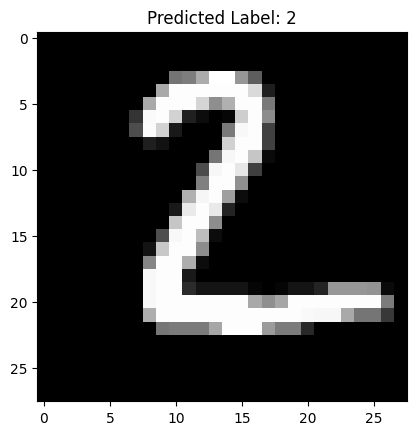

2

In [176]:
predict(test_images[1])

1/1 [==============================] - 0s 184ms/step


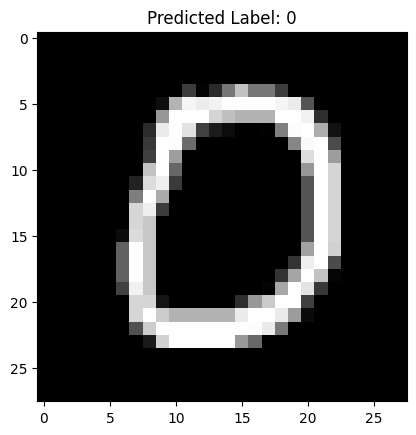

0

In [177]:
predict(test_images[10])

1/1 [==============================] - 0s 75ms/step


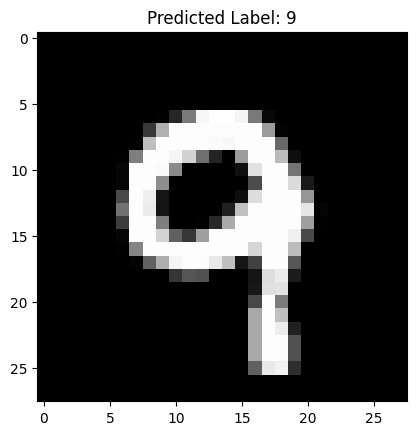

9

In [178]:
predict(test_images[99])

1/1 [==============================] - 0s 73ms/step


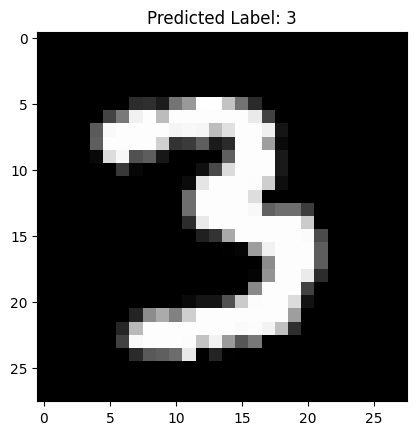

3

In [179]:
predict(test_images[500])